# 단열선도
- 간단한 skew T - log p daigram 그리기
- 자료는 http://weather.uwyo.edu/upperair/sounding.html 에서 받을 수 있음 (단열선도 이미지도 받을 수 있음)

# Siphon
- https://unidata.github.io/siphon/latest/index.html
- 원격서버로부터 자료를 내려받는 것을 지원하는 패키지
- 주로 미국 서버에서 지상 관측(AWS, 부이), 상층 관측, 레이더 자료 등을 받을 수 있음
- conda install -c conda-forge siphon 으로 설치

In [2]:
from datetime import datetime

import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [8]:
#dt = datetime(2002, 9, 28, 6)
dt = datetime(2021, 9, 21, 0)
station = 'RKSO'

# 'RKSO': 오산
# 'RKSP': 백령도
# 'RKTH': 포항
# 'RKTD': 대전
# 'RKJJ': 광주
# 'RKPC': 제주
# 'RKNN': 강릉

In [9]:
# Read remote sounding data based on time (dt) and station
df = WyomingUpperAir.request_data(dt, station)

# Create dictionary of united arrays
data = pandas_dataframe_to_unit_arrays(df)

In [10]:
# Isolate united arrays from dictionary to individual variables
p = data['pressure']
T = data['temperature']
Td = data['dewpoint']
u = data['u_wind']
v = data['v_wind']

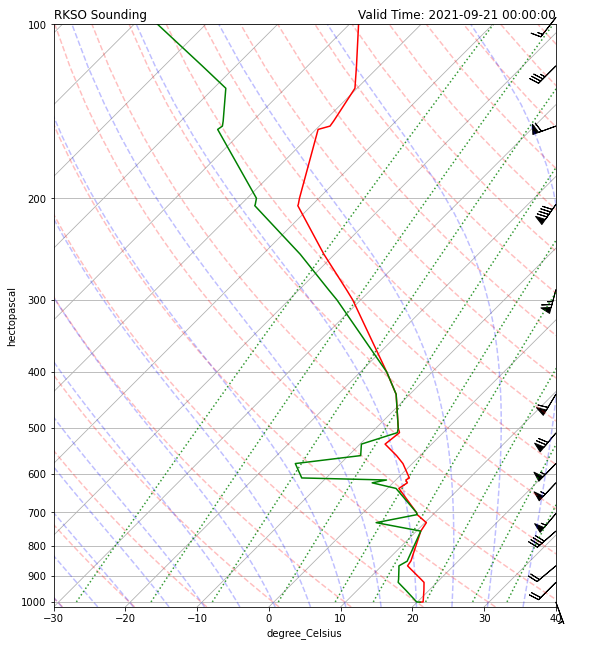

In [11]:
# Change default to be better for skew-T
fig = plt.figure(figsize=(9, 11))

# Initiate the skew-T plot type from MetPy class loaded earlier
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::3], u[::3], v[::3], y_clip_radius=0.03)

# Set some appropriate axes limits for x and y
skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1020, 100)

# Add the relevant special lines to plot throughout the figure
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green')
skew.plot_mixing_lines(pressure=np.arange(1000, 99, -20) * units.hPa,
                       linestyle='dotted', color='tab:blue')

# Add some descriptive titles
plt.title('{} Sounding'.format(station), loc='left')
plt.title('Valid Time: {}'.format(dt), loc='right');